In [1]:
import os
import numpy as np
import pandas as pd

from functools import reduce

import matplotlib.pyplot as plt
%matplotlib inline

### Loading FAO and World Bank Data

The purpose of this Jupyter Notebook is to determine if there are significant differences between demographic datasets coming from FAO or the World Bank. Both datasets have data in the time period we are interested in, 2000-2018, but the FAO data is easier to download whereas the World Bank data has age-related information that we are interested in. Perhaps a mix of both will work.

In [2]:
data_path = '../data/'
raw = 'raw'
processed = 'processed'
type_of_data = 'demographics'

append_in = '_'+type_of_data+'_'+raw+'.csv'
append_out = '_'+type_of_data+'_'+processed+'.csv'
append_in_wb = '_'+type_of_data+'_wb_'+raw+'.csv'
append_out_wb = '_'+type_of_data+'_wb_'+processed+'.csv'

kenya_name = 'kenya'
rwanda_name = 'rwanda'
tanzania_name = 'tanzania'
uganda_name = 'uganda'

#where to load from
kenya_load = os.path.join(data_path, raw, type_of_data, kenya_name+append_in)
rwanda_load = os.path.join(data_path, raw, type_of_data, rwanda_name+append_in)
tanzania_load = os.path.join(data_path, raw, type_of_data, tanzania_name+append_in)
tanzania_load_wb = os.path.join(data_path, raw, type_of_data, tanzania_name+append_in_wb)
uganda_load = os.path.join(data_path, raw, type_of_data, uganda_name+append_in)

#where to save to
kenya_save = os.path.join(data_path, processed, type_of_data, kenya_name+append_out)
rwanda_save = os.path.join(data_path, processed, type_of_data, rwanda_name+append_out)
tanzania_save = os.path.join(data_path, processed, type_of_data, tanzania_name+append_out)
tanzania_save_wb = os.path.join(data_path, processed, type_of_data, tanzania_name+append_out_wb)
uganda_save = os.path.join(data_path, processed, type_of_data, uganda_name+append_out)

In [3]:
print(tanzania_load_wb)
print(tanzania_save_wb)

../data/raw/demographics/tanzania_demographics_wb_raw.csv
../data/processed/demographics/tanzania_demographics_wb_processed.csv


In [4]:
def load_fao_demographics(path_name):
    country = pd.read_csv(path_name)
    
    df_list = []
    fao_drop_columns = ['Domain Code', 'Domain', 'Unit', 'Area Code', 'Area', 'Element Code', 'Element',
                        'Item Code', 'Item', 'Year Code', 'Flag', 'Flag Description', 'Note']

    country_data = country.loc[:, 'Element'].unique()

    #returns a dictionary of types of population data
    country_dict = country.groupby('Element').groups

    for key, value in country_dict.items():
        column_data = country.loc[country_dict[key].values, :]
        column_data.reset_index(inplace=True, drop=True)
        column_data.drop(fao_drop_columns, inplace=True, axis=1)
        column_data.columns = ['Date-Monthly', key]
        column_data['Date-Monthly'] = ['Jun-'+entry[-2:] for entry in column_data['Date-Monthly'].astype(str)]
        df_list.append(column_data)

    #source: https://stackoverflow.com/questions/38089010/merge-a-list-of-pandas-dataframes
    processed_data = reduce(lambda x, y: pd.merge(x, y, on=['Date-Monthly']), df_list)
    
    return processed_data

In [5]:
kenya_fao = load_fao_demographics(kenya_load)
rwanda_fao = load_fao_demographics(rwanda_load)
tanzania_fao = load_fao_demographics(tanzania_load)
uganda_fao = load_fao_demographics(uganda_load)

In [6]:
tanzania_fao.head(20)

,Date-Monthly,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population
0,Jun-00,26553.317,33499.180,16838.006,16661.171,7624.725
1,Jun-01,27154.582,34385.856,17283.163,17102.686,7962.437
2,Jun-02,27785.622,35334.788,17758.831,17575.959,8320.186
3,Jun-03,28377.799,36337.782,18260.492,18077.286,8771.273
4,Jun-04,28984.506,37379.767,18780.108,18599.658,9265.478
5,Jun-05,29619.018,38450.320,19312.186,19138.137,9791.527
6,Jun-06,30282.031,39548.663,19856.009,19692.657,10352.917
7,Jun-07,30972.693,40681.414,20415.193,20266.223,10951.022
8,Jun-08,31684.102,41853.944,20993.496,20860.448,11586.042
9,Jun-09,32408.679,43073.834,21596.200,21477.630,12255.552


The reason that I picked June for the month in our annual demographic data is that if you were to average over all the values in a 12 month period, you would get the average, or middle, value. The middle month in the year is June (or July), so I labeled the data as such.

You can see a simplification of the cases that I am thinking about below: regardless of if you had a downward sloping, unchanging, or upward sloping function the middle value would be, well, in the middle. This explanation may seem like overkill here, but you can imagine how badly interpolation down to a monthly scale would have gone had I had labeled the average value January or December (which would either incorrectly peg the annual average as the lowest or highest value during the year).

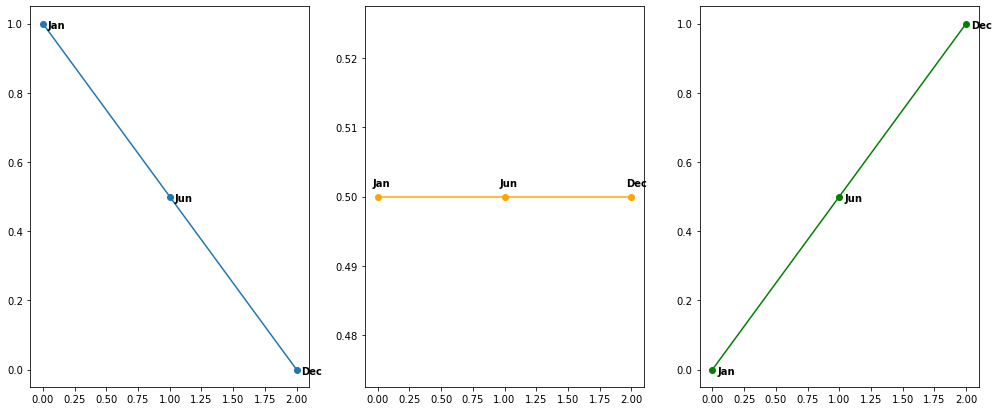

In [7]:
m = ['Jan', 'Jun', 'Dec']
x = [0, 1, 2]
ydown = [1, 0.5, 0]
ymid = [0.5, 0.5, 0.5]
yup = [0, 0.5, 1]

fig, ax = plt.subplots(1, 3, figsize=(17,7))
#downward slant
ax[0].plot(x, ydown, marker='o')
for i, value in enumerate(zip(x, ydown)):
    ax[0].annotate(m[i], value, weight='bold', textcoords='offset points', xytext=(5,-5))

#downward slant
ax[1].plot(x, ymid, color='orange', marker='o')
for i, value in enumerate(zip(x, ymid)):
    ax[1].annotate(m[i], value, weight='bold', textcoords='offset points', xytext=(-5,10))

#upward slant
ax[2].plot(x, yup, color='green', marker='o')
for i, value in enumerate(zip(x, yup)):
    ax[2].annotate(m[i], value, weight='bold', textcoords='offset points', xytext=(5,-5))

plt.show()

Let's look at how population has changed over time for one of our countries: Tanzania.

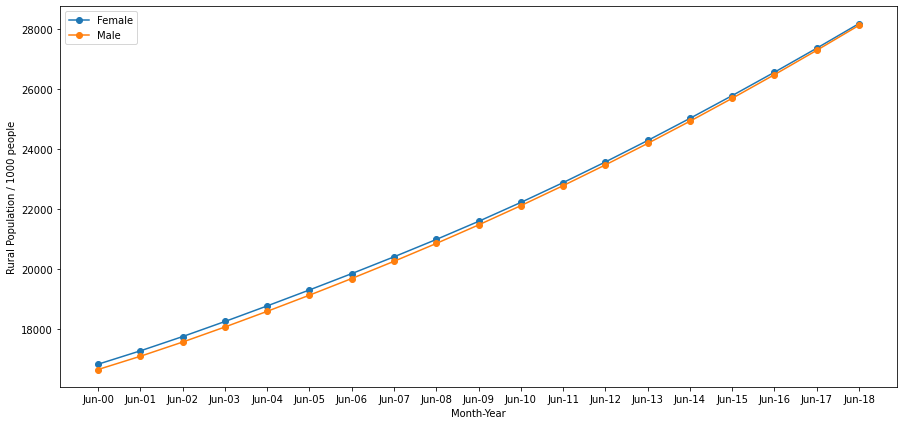

In [8]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(tanzania_fao['Date-Monthly'], tanzania_fao['Total Population - Female'], marker='o', label='Female')
ax.plot(tanzania_fao['Date-Monthly'], tanzania_fao['Total Population - Male'], marker='o', label='Male')

ax.set_xlabel('Month-Year')
ax.set_ylabel('Rural Population / 1000 people')

ax.legend()
plt.show()

In [9]:
#save fao data to compare to wb data
total_pop = tanzania_fao['Total Population - Both sexes']
rural_pop = tanzania_fao['Rural population']
urban_pop = tanzania_fao['Urban population']
male_pop = tanzania_fao['Total Population - Male']
female_pop = tanzania_fao['Total Population - Female']

### World Bank Data

In [10]:
def load_worldbank_demographics(path_name):
    country = pd.read_csv(path_name)
    
    df_list = []
    worldbank_drop_columns = ['Country Name', 'Series Name']

    country_data = country.loc[:, 'Series Name'].unique()

    #returns a dictionary of types of population data
    country_dict = country.groupby('Series Name').groups

    for key, value in country_dict.items():
        column_data = country.loc[country_dict[key].values, :]
        column_data.reset_index(inplace=True, drop=True)
        column_data.drop(worldbank_drop_columns, inplace=True, axis=1)
        column_data.columns = ['Date-Monthly', key]
        column_data['Date-Monthly'] = ['Jun-'+entry[-2:] for entry in column_data['Date-Monthly'].astype(int).astype(str)]
                
        column_data[key] = column_data[key].astype(float)
        
        df_list.append(column_data)    

    #source: https://stackoverflow.com/questions/38089010/merge-a-list-of-pandas-dataframes
    processed_data = reduce(lambda x, y: pd.merge(x, y, on=['Date-Monthly']), df_list)
    
    return processed_data

In [11]:
tanzania_wb = load_worldbank_demographics(tanzania_load_wb)

In [12]:
tanzania_wb.head(20)

,Date-Monthly,"Population ages 15-64, female","Population ages 15-64, male","Population ages 15-64, total","Population ages 65 and above, female","Population ages 65 and above, total",Population in largest city,"Population, female","Population, male","Population, total"
0,Jun-00,8903724.0,8731304.0,17635023.0,500611.0,867259.0,2272483.0,16838008.0,16661172.0,33499180.0
1,Jun-01,9143260.0,8972176.0,18115427.0,515991.0,892144.0,2372882.0,17283167.0,17102689.0,34385856.0
2,Jun-02,9392914.0,9223039.0,18615940.0,530736.0,915162.0,2477865.0,17758830.0,17575958.0,35334788.0
3,Jun-03,9653219.0,9485562.0,19138763.0,544955.0,936494.0,2617331.0,18260494.0,18077288.0,36337782.0
4,Jun-04,9925887.0,9762892.0,19688764.0,558800.0,956418.0,2767907.0,18780109.0,18599658.0,37379767.0
5,Jun-11,12069429.0,11962222.0,24031656.0,670466.0,1140892.0,4091984.0,22887230.0,22786108.0,45673338.0
6,Jun-12,12432012.0,12321596.0,24753607.0,694276.0,1182885.0,4327397.0,23575405.0,23477076.0,47052481.0
7,Jun-13,12813793.0,12699864.0,25513655.0,718618.0,1225309.0,4575650.0,24289804.0,24192462.0,48482266.0
8,Jun-14,13217523.0,13101008.0,26318530.0,742524.0,1266727.0,4838145.0,25027582.0,24932240.0,49959822.0
9,Jun-15,13644845.0,13527666.0,27172511.0,765564.0,1306567.0,5115698.0,25786497.0,25696136.0,51482633.0


In [13]:
population_total = tanzania_wb['Population, total']
dates_fao = tanzania_fao['Date-Monthly']
dates_wb = tanzania_wb['Date-Monthly']

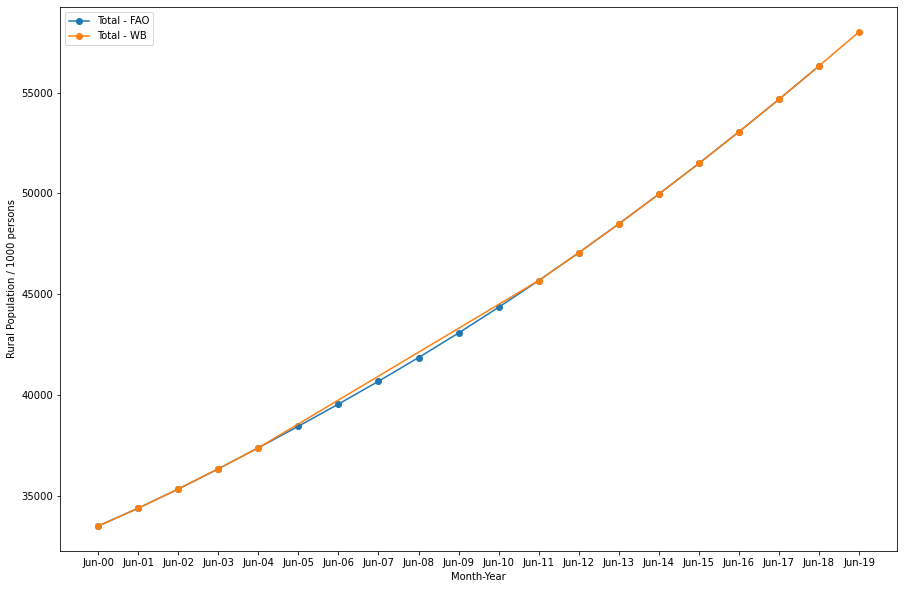

In [14]:
#now plot the two datasets together for total population
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(dates_fao, total_pop, marker='o', label='Total - FAO')
ax.plot(dates_wb, population_total/1000, marker='o', label='Total - WB')

ax.set_xlabel('Month-Year')
ax.set_ylabel('Rural Population / 1000 persons')

ax.legend()
plt.show()

The World Bank has a lot more indicator data than FAO, especially along age and gender lines. This would be really interesting to look at, but there is a problem with the World Bank data. You may not be able to tell from the graph above, but the World Bank data is empty from 2004-2010. That is a full 7 years of missing data, across all variables as far as I can tell. Now, for population that generally rises smoothly along its curve, we could probably get away with interpolating the variables of interest. However, I am also interested in things like energy prices and usage, education levels, land use change statistics, etc., and I think that 7 year gap would not properly capture the variability that I am interested in (not to mention that we are already using annual averages instead of monthly data). For that reason, I think it would be better to use the FAO data for the variables that we want to look at.

In [15]:
#now save data
# kenya_fao.to_csv(kenya_save)
# rwanda_fao.to_csv(rwanda_save)
# tanzania_fao.to_csv(tanzania_save)
# uganda_fao.to_csv(uganda_save)